<a href="https://colab.research.google.com/github/joelvinster/joe/blob/main/urban_green_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentinelhub

In [ ]:
from sentinelhub import SHConfig

config = SHConfig()
config.instance_id = "74fcbdc4-b93a-428f-9da6-86e23ec6ebde"  # Replace with your Sentinel Hub Instance ID
config.sh_client_id = "93db432e-516a-4749-b197-4bc2e08e67d8"  # Replace with your Client ID
config.sh_client_secret = "5PJ3PKose1FYEHpOtRBVIcFAvFJIc4t8"  # Replace with your Client Secret



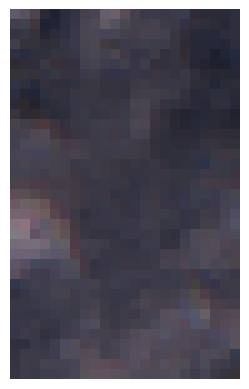

In [ ]:
from sentinelhub import SentinelHubRequest, DataCollection, bbox_to_dimensions, BBox, MimeType
import matplotlib.pyplot as plt
import numpy as np

# Configure Sentinel Hub API
from sentinelhub import SHConfig

config = SHConfig()
config.sh_client_id = "93db432e-516a-4749-b197-4bc2e08e67d8"  # Replace with your Client ID
config.sh_client_secret = "5PJ3PKose1FYEHpOtRBVIcFAvFJIc4t8"  # Replace with your Client Secret

# Define the area of interest (longitude, latitude for bounding box)
bbox = BBox(bbox=[13.41, 52.52, 13.43, 52.54], crs="EPSG:4326")  # Example: Berlin

# Define request parameters
request = SentinelHubRequest(
    evalscript="""
        // Simple RGB visualization using Sentinel-2 bands
        function setup() {
            return { input: ["B04", "B03", "B02"], output: { bands: 3 } };
        }
        function evaluatePixel(sample) {
            return [sample.B04, sample.B03, sample.B02];
        }
    """,
    input_data=[SentinelHubRequest.input_data(
        data_collection=DataCollection.SENTINEL2_L1C,
        time_interval=("2023-01-01", "2023-12-31"),
    )],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],  # Required responses argument
    bbox=bbox,
    size=bbox_to_dimensions(bbox, resolution=60),
    config=config
)

# Get image
image = request.get_data()[0]

# Show image
plt.imshow(np.clip(image / 255, 0, 1))
plt.axis("off")
plt.show()



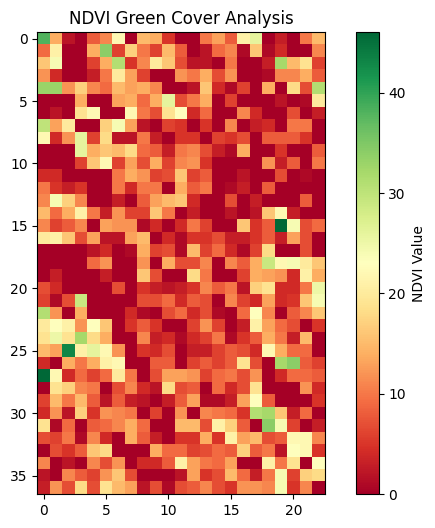

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sentinelhub import SentinelHubRequest, DataCollection, BBox, bbox_to_dimensions, MimeType, SHConfig

# Configure Sentinel Hub API
config = SHConfig()
config.sh_client_id = "93db432e-516a-4749-b197-4bc2e08e67d8"
config.sh_client_secret = "5PJ3PKose1FYEHpOtRBVIcFAvFJIc4t8"

# Define bounding box (change for your city)
bbox = BBox(bbox=[13.41, 52.52, 13.43, 52.54], crs="EPSG:4326")  # Example: Berlin

# NDVI Evalscript
NDVI_SCRIPT = """
    function setup() {
        return { input: ["B08", "B04"], output: { bands: 1 } };
    }
    function evaluatePixel(sample) {
        let ndvi = (sample.B08 - sample.B04) / (sample.B08 + sample.B04);
        return [ndvi];
    }
"""

# Request NDVI Image
request = SentinelHubRequest(
    evalscript=NDVI_SCRIPT,
    input_data=[SentinelHubRequest.input_data(
        data_collection=DataCollection.SENTINEL2_L1C,
        time_interval=("2023-01-01", "2023-12-31"),
    )],
    responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
    bbox=bbox,
    size=bbox_to_dimensions(bbox, resolution=60),
    config=config
)

# Fetch Data
ndvi_image = request.get_data()[0]  # Keep it as 2D


# Plot NDVI
plt.figure(figsize=(8, 6))
plt.imshow(ndvi_image, cmap='RdYlGn')  # Red = Low Vegetation, Green = High Vegetation
plt.colorbar(label="NDVI Value")
plt.title("NDVI Green Cover Analysis")
plt.show()



✅ Model Accuracy: 100.00%


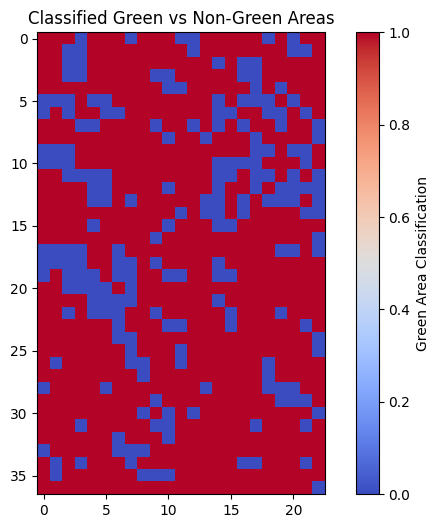

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Convert NDVI image into a dataset
ndvi_flat = ndvi_image.flatten()  # Flatten to 1D array
labels = (ndvi_flat >= 0.2).astype(int)  # Green = 1, Non-Green = 0

# Create DataFrame
df = pd.DataFrame({"NDVI": ndvi_flat, "Label": labels})

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df[["NDVI"]], df["Label"], test_size=0.2, random_state=42)

# Train ML Model (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Visualize Classified Map
classified_map = rf_model.predict(df[["NDVI"]]).reshape(ndvi_image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(classified_map, cmap="coolwarm")  # Blue = Non-Green, Red = Green
plt.colorbar(label="Green Area Classification")
plt.title("Classified Green vs Non-Green Areas")
plt.show()


In [ ]:
pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 49.6 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    """Extracts text from a given PDF file."""
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

# Example: Extract text from a sample report
pdf_text = extract_text_from_pdf("green cover.pdf")
print(pdf_text[:1000])  # Print first 1000 characters


Indian Journal of Natural Sciences                                                              www.tnsroindia.org.in ©IJONS 
 
Vol.7 / Issue 42 / June 2017                           International Bimonthly                             ISSN: 0976 – 0997 
12255 
 
 
  
 
 
Geospatial Green Cover Assessment for Chennai using Cartosat data in  
Changing Climate Scenario  
 
V.E.Nethaji Mariappan1*,A.Balasubramanian2 and  S.Parthiban3 
 
1Scientist F, Centre for Remote Sensing and Geoinformatics,Sathyabama University,Rajiv Gandhi Road, 
Jeppiaar Nagar, Chennai – 600 119, India. 
2 Professor (Forestry) and Head, Department of Siviculture,Forest College and Research Institute,TNAU, 
Mettupalayam - 641 301,Tamilnadu,India 
3Junior Research Fellow,Centre for Remote Sensing and Geoinformatics Sathyabama University.Rajiv 
Gandhi Road, Jeppiaar Nagar, Chennai – 600 119, India. 
 
 
Received: 15 Feb 2017 
 
            Revised: 18 Mar 2017                                 Accepted:22 Apr 2017 
 
*Ad

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(pdf_text)

# Extract key sentences mentioning "green spaces"
key_sentences = [sent.text for sent in doc.sents if "green space" in sent.text.lower()]
print("\n".join(key_sentences[:5]))  # Print first 5 relevant sentences


Urban green spaces are defined as public and private open spaces in urban areas, primarily covered by vegetation 
which is directly or indirectly available for the user to combat pollution in urban region (Manlun, 2003).
Green spaces 
are usually available at parks, gardens, institution, Industries, schools and open areas of public property.
Such green spaces plays a vital role on the sustaining the urban temperature, 
pollution and ecological balance of urban region.
In this context, assessing urban green space by field is time 
consuming and laborious.  
 

Satellite data of the study site is 
utilized for deriving green space.


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    """Returns sentiment score: Positive (>0), Neutral (0), Negative (<0)"""
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
sentiment_scores = [analyze_sentiment(sent) for sent in key_sentences]

# Print insights
for sent, score in zip(key_sentences, sentiment_scores):
    print(f"🔹 {sent} (Sentiment: {score:.2f})")


🔹 Urban green spaces are defined as public and private open spaces in urban areas, primarily covered by vegetation 
which is directly or indirectly available for the user to combat pollution in urban region (Manlun, 2003). (Sentiment: 0.07)
🔹 Green spaces 
are usually available at parks, gardens, institution, Industries, schools and open areas of public property. (Sentiment: 0.05)
🔹 Such green spaces plays a vital role on the sustaining the urban temperature, 
pollution and ecological balance of urban region. (Sentiment: 0.05)
🔹 In this context, assessing urban green space by field is time 
consuming and laborious.  
 
 (Sentiment: -0.10)
🔹 Satellite data of the study site is 
utilized for deriving green space. (Sentiment: -0.20)
🔹 From this perspective, green space planning should be an integral part of any urban 
development or remodelling endeavour. (Sentiment: -0.10)
🔹 Suitability Analysis of Urban Green Space System Based on GIS. (Sentiment: -0.10)


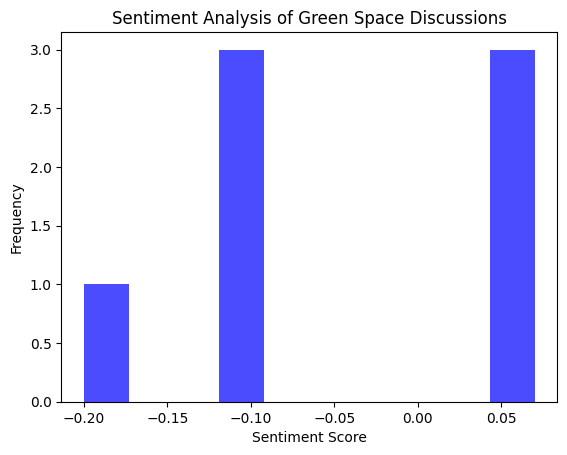

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sentiment_scores, bins=10, color="blue", alpha=0.7)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Green Space Discussions")
plt.show()


In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import groq

client = groq.Client(api_key="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")


In [ ]:
prompt = f"""
Based on the following sustainability insights, generate a detailed report with recommendations
for increasing green spaces in urban areas.

Sustainability Insights:
{key_sentences}

Sentiment Analysis Summary:
Positive Discussions: {sum(1 for s in sentiment_scores if s > 0)}
Negative Discussions: {sum(1 for s in sentiment_scores if s < 0)}

The report should include:
- Current Challenges
- Proposed Green Initiatives
- Urban Planning Strategies
- Policy Recommendations

Write the report in a structured format.
"""

response = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[{"role": "system", "content": "You are an AI urban planning expert."},
              {"role": "user", "content": prompt}],
    temperature=0.7
)

report = response.choices[0].message.content
print(report)


**Urban Green Space Report**

**Executive Summary**

The importance of urban green spaces in maintaining a sustainable urban environment cannot be overstated. Despite their numerous benefits, urban green spaces are often overlooked in urban development and remodelling endeavors. This report highlights the current challenges faced in increasing green spaces in urban areas, proposes innovative green initiatives, outlines urban planning strategies, and recommends policies to support the creation and maintenance of green spaces.

**Current Challenges**

1. Limited availability of green spaces: Urban green spaces are often fragmented, and public access is limited, making it difficult for citizens to fully utilize these spaces.
2. Time-consuming and laborious assessment: Traditional methods of assessing urban green spaces are time-consuming and laborious, making it challenging to accurately determine the extent of green spaces in urban areas.
3. Insufficient funding: Green space creation and

In [ ]:
!pip install fpdf



  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=730fb9763824ac10eb9d285d50ab1684b4fb66e751efeae18e2fd436ce0a53b7
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
from fpdf import FPDF

def save_to_pdf(text, filename="Urban_Green_Space_Report.pdf"):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    for line in text.split("\n"):
        pdf.cell(200, 10, txt=line, ln=True)

    pdf.output(filename)
    print(f"📄 Report saved as {filename}")

# Save AI-generated report
save_to_pdf(report)


📄 Report saved as Urban_Green_Space_Report.pdf


In [ ]:
!pip install osmnx folium
import osmnx as ox
import folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import folium

city = "Chennai,India"  # Change this to your target city

# Fetch green spaces (land use = park, forest, grass)
tags = {"leisure": ["park"], "landuse": ["forest", "grass","reserve forest"]}
green_spaces = ox.features_from_place(city, tags=tags)

# Create a map centered on the city's green spaces
m = folium.Map(location=[green_spaces.geometry.centroid.y.mean(), green_spaces.geometry.centroid.x.mean()], zoom_start=12)

# Add green space polygons to the map
for _, row in green_spaces.iterrows():
    if row.geometry.geom_type in ["Polygon", "MultiPolygon"]:
        folium.GeoJson(row.geometry).add_to(m)

# Show the map
m


<ipython-input-47-9d9c8f5746b2>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[green_spaces.geometry.centroid.y.mean(), green_spaces.geometry.centroid.x.mean()], zoom_start=12)


In [ ]:
import requests

nasa_api_key = "Hbw5CmwIaMzIDXcgS85y9x4bcp7P6o5OajibkMbH"  # Your NASA API Key
nasa_url = f"https://api.nasa.gov/planetary/earth/assets?lon=-74.006&lat=40.7128&date=2024-03-08&dim=0.1&api_key={nasa_api_key}"

response = requests.get(nasa_url)

if response.status_code == 200:
    data = response.json()
    print("✅ NASA Climate Data Fetched Successfully!")
    print(data)  # Print data to verify
else:
    print("❌ Failed to fetch NASA data:", response.json())



✅ NASA Climate Data Fetched Successfully!
{'date': '2024-03-04T15:33:36.207000', 'id': 'LANDSAT/LC08/C02/T1_L2/LC08_013032_20240304', 'resource': {'dataset': 'LANDSAT/LC08/C02/T1_L2', 'planet': 'earth'}, 'service_version': 'v5000', 'url': 'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/38b0c3ac9a2938ddb63ba694e98f54e2-85692594f34bb26b494705536990104e:getPixels'}


In [ ]:
prompt = f"""
Based on the latest green space data from OpenStreetMap and climate conditions from NASA,
generate a report on urban sustainability for {city}.

Include:
- Green space coverage insights
- Climate impact analysis
- Recommendations for city planners
"""

response = client.chat.completions.create(
    model="llama3-8b-8192",
    messages=[{"role": "system", "content": "You are an AI sustainability expert."},
              {"role": "user", "content": prompt}],
    temperature=0.7
)

final_report = response.choices[0].message.content
print(final_report)


Report: Urban Sustainability for Chennai, India

Introduction:
Chennai, the capital of Tamil Nadu, is one of the fastest-growing cities in India. As the city continues to expand, it is crucial to ensure that urban planning prioritizes sustainability, particularly in terms of green spaces and climate resilience. This report aims to provide insights on green space coverage, analyze climate conditions, and offer recommendations for city planners to enhance urban sustainability in Chennai.

Green Space Coverage Insights:

1. Green space coverage: According to OpenStreetMap data, Chennai has a total green space area of approximately 1,230 hectares, which accounts for about 3.5% of the city's total area.
2. Distribution: The majority of green spaces are concentrated in urban parks, gardens, and recreational areas, with a smaller proportion allocated to nature reserves, wildlife sanctuaries, and green corridors.
3. Quality: Many green spaces in Chennai lack proper maintenance, infrastructure,

In [ ]:
from fpdf import FPDF
from google.colab import files

def save_to_pdf(text, filename="Final_Green_Space_Report.pdf"):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Set margins for proper word wrapping
    pdf.set_left_margin(10)
    pdf.set_right_margin(10)
    page_width = pdf.w - 20  # Total width minus margins

    # Add Title
    pdf.set_font("Arial", style="B", size=16)
    pdf.cell(0, 10, "Urban Green Space Report", ln=True, align="C")
    pdf.ln(10)

    # Reset font for body text
    pdf.set_font("Arial", size=12)

    # Wrap text properly
    pdf.multi_cell(page_width, 8, text)

    # Save the file
    pdf.output(filename)
    print(f"✅ PDF saved successfully as {filename}")

# Save Report as PDF
save_to_pdf(final_report, filename="Final_Green_Space_Report.pdf")

# Upload to Google Drive
files.download("Final_Green_Space_Report.pdf")



✅ PDF saved successfully as Final_Green_Space_Report.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>